In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

## Big Model

First we'll test the model trained on 299x299 pictures

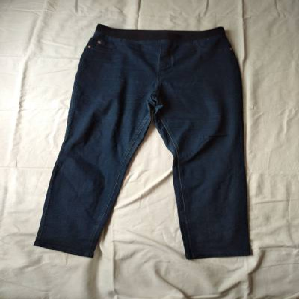

In [4]:
image_size = (299,299)

model = keras.models.load_model('xception_v4_large_08_0.894.h5')

path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(image_size))

img

first pre-process the image

In [5]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

Now get the prediction

In [6]:
pred = model.predict(X)

labels[pred[0].argmax()]

'pants'

Yey !  
Now let's apply it to the entire testing dataset

In [7]:
test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small/test",
    shuffle=False,
    target_size=(299,299),
    batch_size=32
)

Found 372 images belonging to 10 classes.


In [8]:
model.evaluate(test_ds)

12/12 [==============================] - 54s 4s/step - loss: 0.2489 - accuracy: 0.8978


[0.24892038106918335, 0.897849440574646]

The model performs: 89.78% on test

## Small Model

Let's test the small model trained on 150x150 images

In [9]:
model = keras.models.load_model('xception_v3_21_0.853.h5')

In [10]:
image_size = (150,150)

In [11]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 372 images belonging to 10 classes.


In [12]:
model.evaluate(test_ds)

12/12 [==============================] - 13s 980ms/step - loss: 0.5895 - accuracy: 0.8226


[0.589486837387085, 0.8225806355476379]

This model performs: 80% on test